In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("NIFTY 500-07-04-2024-to-07-04-2025.csv")

In [4]:
df

,Date,Open,High,Low,Close,Shares Traded,Turnover (₹ Cr)
0,08-APR-2024,20806.85,20866.10,20768.50,20819.10,2748152839,80224.14
1,09-APR-2024,20912.75,20912.75,20741.50,20790.70,2279238895,76364.21
2,10-APR-2024,20864.55,20933.85,20822.85,20915.20,2571945247,83783.98
3,12-APR-2024,20873.20,20931.40,20735.15,20745.50,3259737705,97394.58
4,15-APR-2024,20493.30,20623.80,20362.30,20478.75,3195278629,90401.72
...,...,...,...,...,...,...,...
243,28-MAR-2025,21439.20,21514.10,21277.90,21339.55,2888247046,90757.05
244,01-APR-2025,21227.10,21398.35,21042.45,21070.75,3960064673,74888.32
245,02-APR-2025,21101.85,21279.10,21007.15,21265.65,2568917368,67877.01
246,03-APR-2025,21100.55,21263.45,21096.75,21243.40,2435646555,76388.65


In [5]:
df.head()

,Date,Open,High,Low,Close,Shares Traded,Turnover (₹ Cr)
0,08-APR-2024,20806.85,20866.10,20768.50,20819.10,2748152839,80224.14
1,09-APR-2024,20912.75,20912.75,20741.50,20790.70,2279238895,76364.21
2,10-APR-2024,20864.55,20933.85,20822.85,20915.20,2571945247,83783.98
3,12-APR-2024,20873.20,20931.40,20735.15,20745.50,3259737705,97394.58
4,15-APR-2024,20493.30,20623.80,20362.30,20478.75,3195278629,90401.72


In [6]:
df.sample(5)

,Date,Open,High,Low,Close,Shares Traded,Turnover (₹ Cr)
142,01-NOV-2024,22806.95,22881.50,22799.70,22823.55,604294357,12277.86
157,26-NOV-2024,22649.30,22675.70,22523.00,22562.45,3250965273,72749.91
147,08-NOV-2024,22821.90,22857.10,22600.25,22645.65,1920361687,78851.05
140,30-OCT-2024,22731.15,22896.55,22685.40,22749.80,2785443346,86789.95
123,07-OCT-2024,23616.35,23659.65,23089.50,23181.95,3037545470,105984.35


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248 entries, 0 to 247
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Date             248 non-null    object 
 1   Open             248 non-null    float64
 2   High             248 non-null    float64
 3   Low              248 non-null    float64
 4   Close            248 non-null    float64
 5   Shares Traded    248 non-null    int64  
 6   Turnover (₹ Cr)  248 non-null    float64
dtypes: float64(5), int64(1), object(1)
memory usage: 13.7+ KB


In [13]:
df.describe()

,Open,High,Low,Close,Shares Traded,Turnover (₹ Cr)
count,248.000000,248.000000,248.000000,248.000000,2.480000e+02,248.000000
mean,22214.735685,22309.556250,22061.483266,22187.282258,2.748133e+09,93853.531290
std,1161.999433,1146.975943,1179.329888,1158.681820,1.152165e+09,26513.158026
min,19736.050000,19957.500000,19624.250000,19880.900000,4.830208e+08,12277.860000
25%,21197.762500,21263.300000,21025.925000,21176.850000,2.042884e+09,79239.750000
50%,22418.950000,22504.300000,22283.375000,22363.900000,2.494670e+09,88518.220000
75%,23174.450000,23233.962500,22982.525000,23109.562500,3.162252e+09,105768.410000
max,24529.550000,24573.400000,24469.000000,24496.900000,1.077779e+10,248672.500000


In [7]:
df.isnull().sum()

Date               0
Open               0
High               0
Low                0
Close              0
Shares Traded      0
Turnover (₹ Cr)    0
dtype: int64

In [8]:
df.dtypes

Date                object
Open               float64
High               float64
Low                float64
Close              float64
Shares Traded        int64
Turnover (₹ Cr)    float64
dtype: object

In [9]:
df.duplicated().sum()

0

In [10]:
df.nunique()

Date               248
Open               248
High               248
Low                248
Close              247
Shares Traded      248
Turnover (₹ Cr)    248
dtype: int64

Data Visulization

In [11]:
df.columns = df.columns.str.strip()

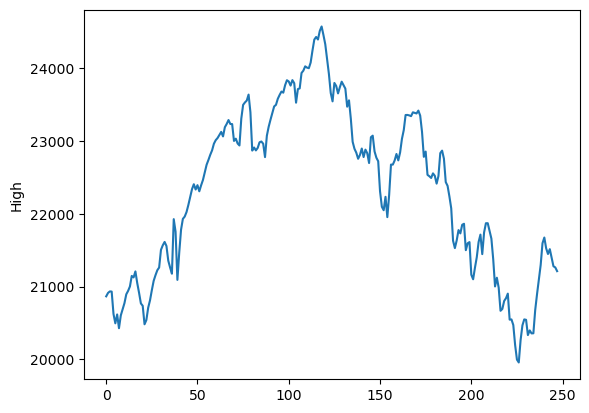

In [12]:
sns.lineplot(df["High"])
plt.show()

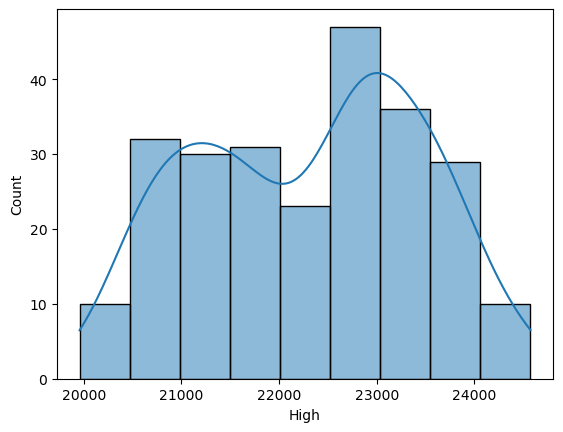

In [13]:
sns.histplot(df["High"], kde=True)
plt.show()

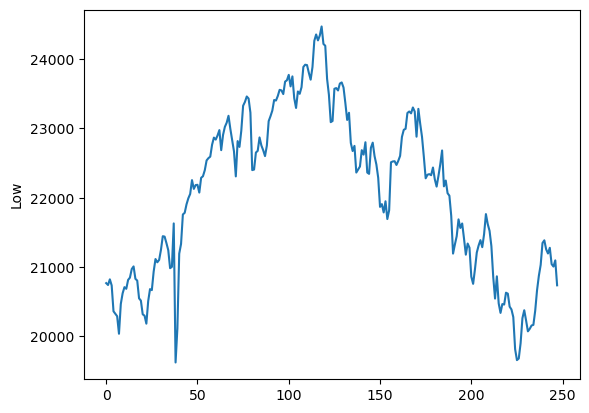

In [14]:
sns.lineplot(df["Low"])
plt.show()

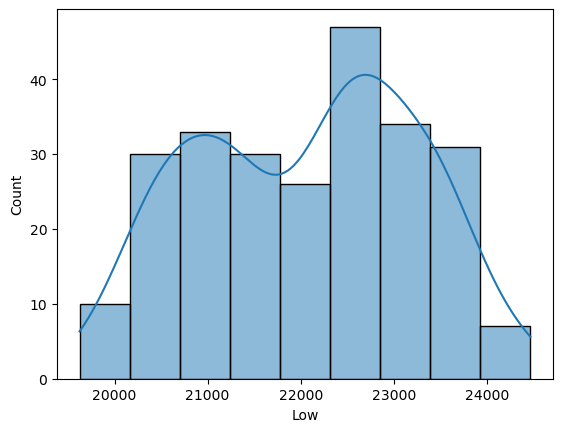

In [15]:
sns.histplot(df["Low"], kde=True)
plt.show()

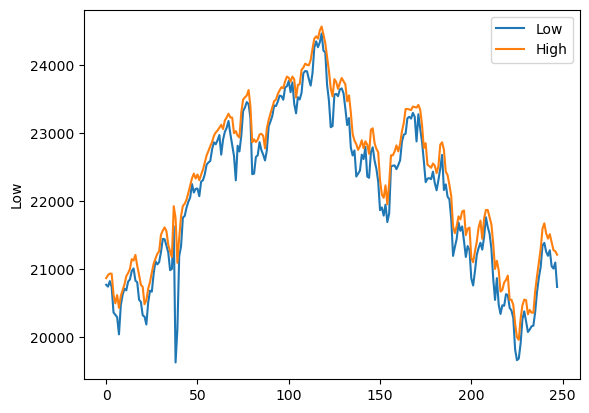

In [16]:
sns.lineplot(df["Low"], label="Low")
sns.lineplot(df["High"], label="High")
plt.legend()
plt.show()

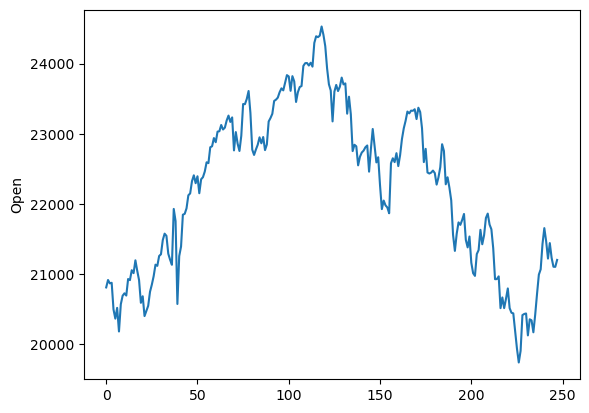

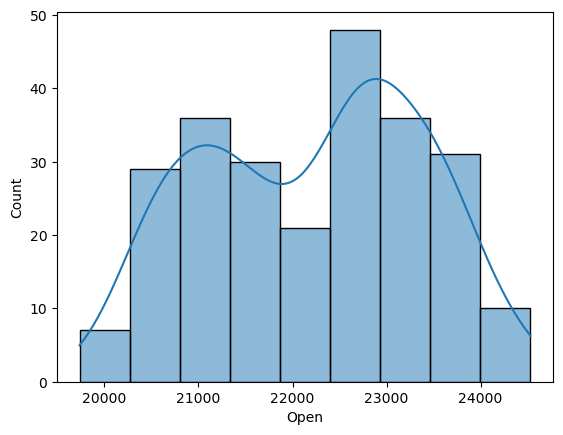

In [17]:
sns.lineplot(df["Open"])
plt.show()

sns.histplot(df["Open"], kde=True)
plt.show()

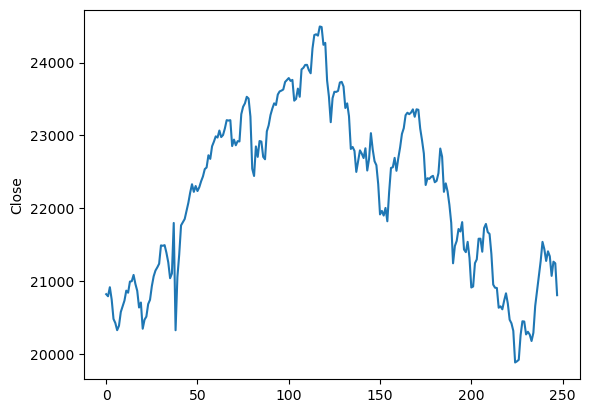

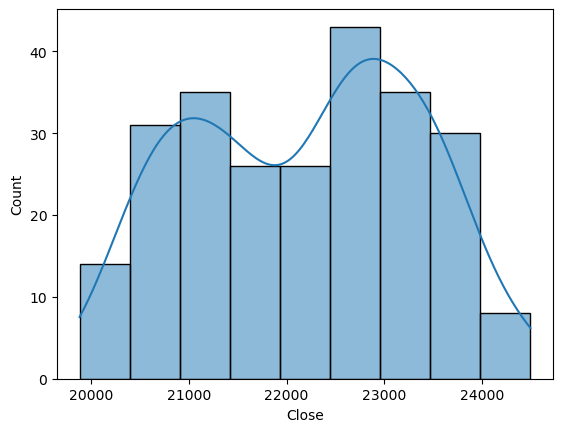

In [18]:
sns.lineplot(df["Close"])
plt.show()

sns.histplot(df["Close"], kde=True)
plt.show()

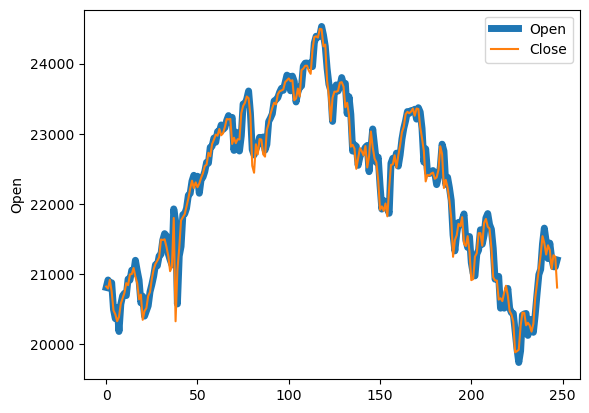

In [19]:
sns.lineplot(df["Open"], linewidth=5, label="Open")
sns.lineplot(df["Close"], label="Close")
plt.legend()
plt.show()

In [ ]:
sns.pairplot(df)
plt.show()

In [21]:
x = df[["Open","High","Low","Close","Shares Traded","Turnover (₹ Cr)"]].corr()
x

,Open,High,Low,Close,Shares Traded,Turnover (₹ Cr)
Open,1.000000,0.997129,0.988302,0.986981,-0.059106,0.163199
High,0.997129,1.000000,0.989069,0.992369,-0.058651,0.167240
Low,0.988302,0.989069,1.000000,0.995104,-0.098698,0.113461
Close,0.986981,0.992369,0.995104,1.000000,-0.078967,0.141394
Shares Traded,-0.059106,-0.058651,-0.098698,-0.078967,1.000000,0.791396
Turnover (₹ Cr),0.163199,0.167240,0.113461,0.141394,0.791396,1.000000


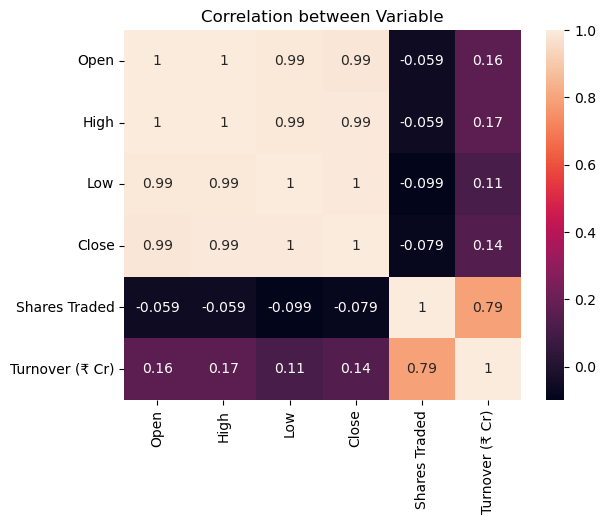

In [22]:
sns.heatmap(x, annot=True)
plt.title("Correlation between Variable")
plt.show()

In [23]:
#Data split
x = df[["Open","High","Low"]]
y = df["Close"]


In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2, random_state=2)

In [25]:
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(198, 3) (50, 3) (198,) (50,)


In [26]:
Y_test

186    22341.65
90     23280.35
165    23312.10
166    23292.00
91     23368.65
217    20611.40
216    20652.35
30     21489.55
35     21038.55
74     23292.05
10     20730.65
66     23209.85
144    22679.85
160    22687.00
133    23263.25
3      20745.50
71     22865.20
135    22841.10
221    20468.45
154    21820.85
111    23898.65
155    22225.55
239    21538.10
24     20741.85
232    20264.35
182    22481.80
53     22436.80
101    23748.90
20     20344.80
188    22046.55
13     20992.20
134    22814.45
41     21764.15
222    20418.75
122    23534.95
226    19917.85
215    20633.10
23     20683.80
157    22562.45
142    22823.55
14     20997.20
173    22934.40
65     23095.45
141    22689.35
126    23598.15
192    21551.20
172    23095.75
25     20929.05
164    23277.95
236    20864.50
Name: Close, dtype: float64

In [27]:
#Model Selection 
from sklearn.linear_model import LinearRegression

In [28]:
lr = LinearRegression()

In [29]:
lr.fit(X_train, Y_train)

LinearRegression()

In [31]:
y_pred = lr.predict(X_test)

In [32]:
#Model Efficiency
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [33]:
print("Mean Aboslute Error", mean_absolute_error(y_pred, Y_test))
print("Mean Squared Error", mean_squared_error(y_pred, Y_test))
print("R2", r2_score(y_pred, Y_test))

Mean Aboslute Error 54.11897015884606
Mean Squared Error 6334.6076847864115
R2 0.9952675415686595


In [34]:
lr.fit(X_test, Y_test)

LinearRegression()